<a href="https://colab.research.google.com/github/Martipetti/MachineLearning/blob/main/Modelli/Rete%20Neurale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product
from sklearn.metrics import roc_curve, roc_auc_score

Download the data

In [38]:
link = 'http://tennis-data.co.uk/2023/2023.xlsx'
totalData = pd.read_excel(link)

In [41]:
totalData

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3,Giron M.,...,1.0,Completed,1.91,1.91,1.93,1.95,1.99,1.95,1.89,1.89
1,1,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3,Mcdonald M.,...,0.0,Retired,1.36,3.20,1.39,3.25,1.44,3.40,1.36,3.12
2,1,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Kecmanovic M.,...,0.0,Completed,1.57,2.38,1.58,2.53,1.64,2.53,1.58,2.36
3,1,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Nishioka Y.,...,1.0,Completed,3.75,1.29,4.00,1.28,4.00,1.31,3.56,1.29
4,1,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Popyrin A.,...,0.0,Completed,6.50,1.11,6.20,1.15,6.75,1.18,6.04,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,64,Turin,Masters Cup,2023-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Alcaraz C.,...,0.0,Completed,1.67,2.20,1.78,2.16,1.78,2.30,1.68,2.19
2699,64,Turin,Masters Cup,2023-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Zverev A.,...,0.0,Completed,1.62,2.30,1.74,2.23,1.76,2.35,1.66,2.22
2700,64,Turin,Masters Cup,2023-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Sinner J.,...,1.0,Completed,1.67,2.20,1.69,2.31,1.71,2.36,1.64,2.26
2701,64,Turin,Masters Cup,2023-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Djokovic N.,...,0.0,Completed,1.62,2.30,1.67,2.36,1.70,2.43,1.63,2.28


Cleaning DataSet

In [3]:
totalData = totalData[totalData['Series'] == 'Grand Slam']

In [4]:
trainingSet = totalData[["Tournament", "Surface", "Round", "Winner", "Loser", "WRank", "LRank", "B365W", "B365L", "PSW", "PSL"]]

In [5]:
for column in trainingSet:
  trainingSet.dropna(subset=[column], inplace=True)

<ipython-input-5-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-5-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-5-ce7461797c1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.dropna(subset=[column], inplace=True)
<ipython-input-5-ce7461797c1b>:2: SettingWithCopy

In [6]:
trainingSet.reset_index(drop=True, inplace=True)
trainingSet.index = range(1, len(trainingSet) + 1)

In [7]:
nuovi_nomi_colonne = ["Tournament","Surface", "Round", "Player1", "Player2", "Rank1", "Rank2", "B1", "B2", "PS1", "PS2"]
trainingSet.columns = nuovi_nomi_colonne

In [8]:
trainingSet["target"] = 0

<ipython-input-8-60ba1f42b5c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["target"] = 0


Mapping string to integer

In [9]:
trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
trainingSet["Surface"] = trainingSet["Surface"].astype("category")
trainingSet["Round"] = trainingSet["Round"].astype("category")
trainingSet["Player1"] = trainingSet["Player1"].astype("category")
trainingSet["Player2"] = trainingSet["Player2"].astype("category")

<ipython-input-9-1d9e29e86b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = trainingSet["Tournament"].astype("category")
<ipython-input-9-1d9e29e86b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = trainingSet["Surface"].astype("category")
<ipython-input-9-1d9e29e86b61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [10]:
trainingSet.dtypes

Tournament    category
Surface       category
Round         category
Player1       category
Player2       category
Rank1          float64
Rank2          float64
B1             float64
B2             float64
PS1            float64
PS2            float64
target           int64
dtype: object

In [11]:
label_encoder = LabelEncoder()
trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
trainingSet["Round"] = label_encoder.fit_transform(trainingSet["Round"])

<ipython-input-11-be19e985f5d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Tournament"] = label_encoder.fit_transform(trainingSet["Tournament"])
<ipython-input-11-be19e985f5d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Surface"] = label_encoder.fit_transform(trainingSet["Surface"])
<ipython-input-11-be19e985f5d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [12]:
label_encoder = LabelEncoder()
label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
tmp_1 = label_encoder.transform(trainingSet["Player1"])
tmp_2 = label_encoder.transform(trainingSet["Player2"])
trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2

<ipython-input-12-98cfb96ab1d4>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label_encoder.fit(trainingSet["Player2"].append(trainingSet["Player1"]))
<ipython-input-12-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], trainingSet["Player2Code"] = tmp_1, tmp_2
<ipython-input-12-98cfb96ab1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet["Player1Code"], training

Mixing the player to avoid the pattern with the winner on the first columns and the loser on the second one

In [13]:
trainingSet

,Tournament,Surface,Round,Player1,Player2,Rank1,Rank2,B1,B2,PS1,PS2,target,Player1Code,Player2Code
1,0,2,0,Moutet C.,Wu Y.,62.0,114.0,2.38,1.57,2.40,1.65,0,116,184
2,0,2,0,Watanuki Y.,Rinderknech A.,138.0,59.0,2.30,1.62,2.18,1.77,0,181,143
3,0,2,0,Van De Zandschulp B.,Ivashka I.,34.0,73.0,1.36,3.20,1.47,2.91,0,174,75
4,0,2,0,Etcheverry T.,Barrere G.,79.0,83.0,2.30,1.62,2.43,1.63,0,48,7
5,0,2,0,Sinner J.,Edmund K.,16.0,581.0,1.06,10.00,1.05,15.72,0,157,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2,2,4,Medvedev D.,Rublev A.,3.0,8.0,1.36,3.20,1.39,3.30,0,105,145
501,2,2,4,Alcaraz C.,Zverev A.,1.0,12.0,1.20,4.50,1.22,4.90,0,1,190
502,2,2,5,Djokovic N.,Shelton B.,2.0,47.0,1.06,10.00,1.09,9.76,0,42,154
503,2,2,5,Medvedev D.,Alcaraz C.,3.0,1.0,4.33,1.22,4.13,1.28,0,105,1


In [14]:
swap_rows = trainingSet.index[::2]

df_swapped = trainingSet.loc[swap_rows]
df_swapped['Player1Code'], df_swapped['Player2Code'] = df_swapped['Player2Code'], df_swapped['Player1Code']
df_swapped['target'] = 1
df_swapped['Rank1'], df_swapped['Rank2'] = df_swapped['Rank2'], df_swapped['Rank1']
df_swapped['B1'], df_swapped['B2'] = df_swapped['B2'], df_swapped['B1']
df_swapped['PS1'], df_swapped['PS2'] = df_swapped['PS2'], df_swapped['PS1']

trainingSet = pd.concat([trainingSet.loc[~trainingSet.index.isin(swap_rows)], df_swapped])

In [15]:
trainingSet = trainingSet.drop(["Player1", "Player2"], axis=1)

Scaling and splitting the data and rename the data set

In [16]:
trainingSet = shuffle(trainingSet)

In [17]:
X_train = trainingSet[trainingSet["Tournament"] != 3]
X_test = trainingSet[trainingSet["Tournament"] == 3]

In [18]:
y_train = X_train["target"]
y_test = X_test["target"]

In [19]:
X_train = X_train.drop(columns=["target"])
X_test = X_test.drop(columns=["target"])

In [20]:
standardScaler = StandardScaler()
X_train = pd.DataFrame(standardScaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(standardScaler.fit_transform(X_test), columns = X_test.columns)

In [21]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Creating the neural network model

In [22]:
def correctValue(pred):
  for i in range(pred.shape[0]):
    value = pred[i]
    if (value[0]>value[1]):
      pred[i] = [1,0]
    else:
      pred[i] = [0,1]
  return pred

In [23]:
def firstValue(pred):
  return np.array([tmp[0] for tmp in pred])

In [25]:
y_test_first = firstValue(y_test)

In [59]:
def create_model(firstLayer=11, secondLayer=11, thirdLayer=11, learning_rate=0.1, oneMoreLayer=0):
    model = Sequential()
    model.add(Dense(firstLayer, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(secondLayer, activation='relu'))
    if(oneMoreLayer == 1):
      model.add(Dense(thirdLayer, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

param_grid = {
              'batch_size': [10, 15, 20],
              'epochs': [10, 15, 20],
              'firstLayer': [44, 55, 110],
              'secondLayer': [22, 44],
              "thirdLayer": [12, 22],
              'learning_rate': [0.01, 0.01, 0.1],
              "oneMoreLayer": [0, 1]}

best_accuracy = 0
best_params = {}
best_model = None

for params in product(*param_grid.values()):

  model = create_model(params[2], params[3], params[4], params[5])

  model.fit(X_train, y_train, batch_size=params[0], epochs=params[1], verbose=0)

  y_pred = model.predict(X_test)
  y_pred = correctValue(y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  print("Hyperparameters: ", params)
  print("Accuracy: ", accuracy)
  print("------------------------------------------------")

  if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_params = params
      best_model = model
      best_batch_size = params[0]
      best_epochs = params[1]

print("Best hyperparameters: ", best_params)
print("Best accuracy: ", best_accuracy)

4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 44, 22, 12, 0.01, 0)
Accuracy:  0.6614173228346457
------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 44, 22, 12, 0.01, 1)
Accuracy:  0.7165354330708661
------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 44, 22, 22, 0.01, 0)
Accuracy:  0.7007874015748031
------------------------------------------------
4/4 [==============================] - 0s 4ms/step
Hyperparameters:  (10, 10, 44, 22, 22, 0.01, 1)
Accuracy:  0.6535433070866141
------------------------------------------------
4/4 [==============================] - 0s 5ms/step
Hyperparameters:  (10, 10, 44, 44, 12, 0.01, 0)
Accuracy:  0.6850393700787402
------------------------------------------------
4/4 [==============================] - 0s 3ms/step
Hyperparameters:  (10, 10, 44, 44, 12, 0.01, 1)
Accuracy:  

In [ ]:
y_test_first = firstValue(y_test)
y_pred_first = firstValue(y_pred)

In [32]:
model = Sequential()
model.add(Dense(44, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics='accuracy')

In [33]:
model.fit(X_train, y_train, batch_size=15, epochs=20, verbose=1)

Epoch 1/20
26/26 [==============================] - 1s 1ms/step - loss: 0.6268 - accuracy: 0.6684
Epoch 2/20
26/26 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7241
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7321
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7294
Epoch 5/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7347
Epoch 6/20
26/26 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7241
Epoch 7/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7374
Epoch 8/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7560
Epoch 9/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7719
Epoch 10/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7533
Epoch 11/20
26/26 [

In [34]:
y_pred = model.predict(X_test)
y_pred = correctValue(y_pred)
y_pred_first = firstValue(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

4/4 [==============================] - 0s 3ms/step
Accuracy:  0.7480314960629921


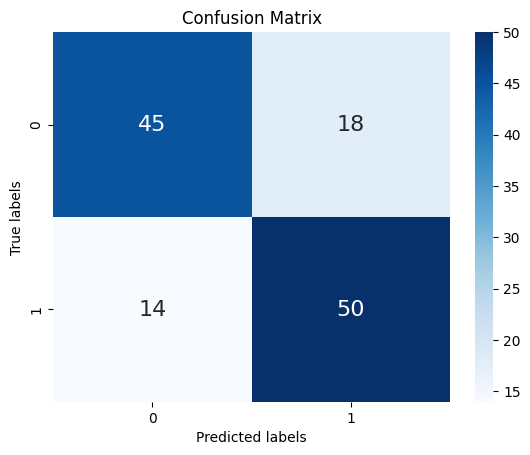

In [35]:
conf_matrix = confusion_matrix(y_test_first, y_pred_first, labels=None, sample_weight=None)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

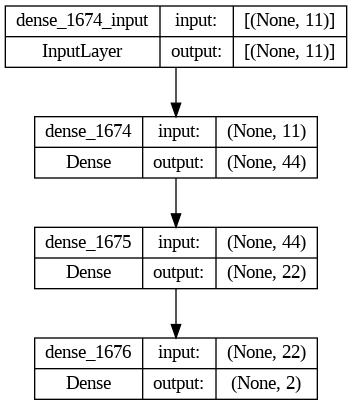

In [89]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [90]:
weights = model.get_weights()

# Visualizza i pesi dei neuroni
for layer_weights in weights:
    print(layer_weights)

[[-0.00433632  0.24655457 -0.23206311  0.08296169 -0.2845141   0.35773957
  -0.3045239  -0.25486922 -0.21323277 -0.25203165  0.13282433 -0.28199118
  -0.00876699 -0.39183012  0.26379457 -0.37815654 -0.03973422  0.34104177
  -0.07219157 -0.18716002  0.3780066   0.0285743  -0.02103907  0.54160833
   0.4874198   0.12685993 -0.3591681  -0.15416387  0.12834002 -0.00526042
  -0.3227587   0.04484202  0.38383517  0.23308979  0.22739005  0.04383545
  -0.35912156 -0.12788118 -0.23779428  0.04963779 -0.13955224 -0.3951387
  -0.50555456 -0.38495395]
 [-0.27971157 -0.26567554 -0.14627254 -0.10800696  0.36824253 -0.10543381
   0.42960054  0.02065313  0.07213435  0.20322828 -0.00137784 -0.29119068
   0.1970873  -0.41692123  0.31822374  0.09579606 -0.33493823  0.44689497
  -0.20193721  0.2785962  -0.21351185 -0.11083742 -0.19476119 -0.08796461
  -0.20600535  0.20824385  0.4767647  -0.23987396 -0.12719487 -0.21373707
  -0.20070346  0.29241356 -0.04828482  0.04145113  0.443316    0.07783155
  -0.2169452

ROC

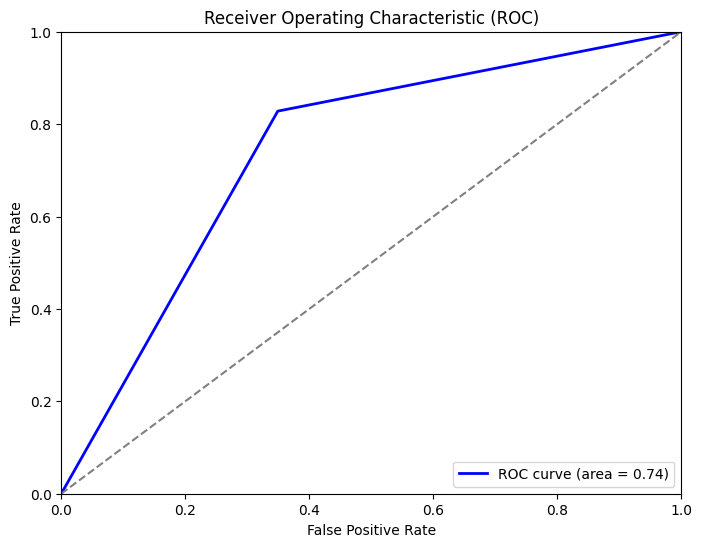

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcolare le probabilità delle classi per i dati di test
y_pred_prob = y_pred

# Calcolare la curva ROC per la classe positiva (indice 1)
fpr, tpr, thresholds = roc_curve(y_test_first, y_pred_first)

# Calcolare l'area sotto la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
